## System Dynamics Exercise

### Impact of Raising Rail Fare on Average Travel Time for a Major Road in a Highly Urbanized City of a Developing Country

#### Background

For this exercise, we created a hypothetical scenario to demonstrate a system dynamics application in policy making. 

Consider a major road (for this exercise we simply refer to it as "R1") in a highly urbanized city of a third world country with a length of 12 kilometers. R1 serves 800,000 commuters during the peak travel time of 6 to 9am and 4 to 8pm from Monday to Friday. There are four types of vehicles in R1 according to capacity: buses, vans, and cars. Buses and vans are public utilities that can carry 80, and 16 people, respectively. Cars on the other hand are further categorized into two: private cars and taxis (ride sharing is lumped with taxis in this scenario) which on average can only handle three passengers. Running on the middle of R1 is a railway system that can handle 430 person spread along eight cars. We call the railway system "R2". 

Consider also that of the 800,000 commuters a majority are from low income (LI) families (60%). Middle income (MI) and high income (MI) commuters comprise 30%, and 10% of the total, respectively. R2 is government subsidized which keeps its fares low. Too low that it became the preffered mode of transport of lower income commuters. MI commuters prefer buses, vans, their private vehicles, and ride sharing over R2 because of congestion. HI commuters uses their own vehicles.

Government regulators are exploring policies that will lower travel time for everyone, and are looking for new ideas. One of this ideas is to lower the number of private vehicles in R1 and force MI riders to R2. To do this, LI riders would be forced to take the bus (an "anti-poor" measure) and MI riders in turn would be enticed to take R2. 

To study whether the proposed intervention will actually result in the desired behavior change, a system dynamic study was commissioned.

#### Causal Flow Diagram

#### Stock and Flow Model

#### Equations

The average travel time is defined as:

$$ travelTime_{average} = \frac {\sum travelTime_{rider}} {totalNumberRiders} $$

The travel time for each type of vehicles are defined as proportional to the total number of vehicles in R1. 

$$ travelTime_{buses} \alpha (num_{buses} + num_{cars} + num_{vans}) $$
$$ travelTime_{vans} \alpha (num_{buses} + num_{cars} + num_{vans}) $$
$$ travelTime_{cars} \alpha (num_{buses} + num_{cars} + num_{vans}) $$


A proportional relationship between fare and the proportion of LI riders using R2 was established. This proportional 




**Assumptions:**

1. There are multiple ways people are transported in EDSA: private vehicles, buses, MRT, vans, taxis, and Grab.
2. MRT riders are lower income riders. We propose an inverse relationship between propensity to ride MRT and average daily wage. 
3. The main reason commuters choose MRT is its low fare. Conversely, riders reject MRT due to overcrowding. 
4. We propose a inverse proportional relationship between MRT occupancy and fare (i.e. as the fare increases occupancy decreases). 
5. We also propose a linear relationship between occupancy rate in increase in middle income ridership in MRT.
6. We assume that high income commuters will always use their cars. 
7. We assume that higher demand for buses will increase the number of buses (obvious).
8. We assume that middle income riders will take MRT and not use private vehicles to travel. 
9. We assume the following mix of EDSA commuters: 10% high income, 40% middle income, and 50% low income.
10. The total number of MRT rides is unchanged.
11. The fare for buses remains the same. 
12. The fare for taxi is constant. 

**Hypothesis:**

 1. Increasing MRT fare will decrease the average travel time per person in EDSA

**Rationale:** 

1. An increase in fare will force lower income riders to use buses.
2. Shifting ridership of lower income commuters to buses will decongest MRT encouraging middle income riders to use it.
3. Increasing middle income ridership in MRT decreases the number of private vehicles, taxis, and Grabs in EDSA decreasing the travel time for every commuter. 

**Equations:**

1. average_travel_time = summation(travel_time of each rider) / total number of riders
2. travel_time_buses is proportional to number of buses + number of cars + number of Grabs + number of taxis
3. travel_time_car  is proportional to number of buses + number of cars + number of Grabs + number of taxis 
4. travel_time_Grabs is proportional to number of buses + number of cars + number of Grabs + number of taxis
5. travel_time_taxis is proportional to number of buses + number of cars + number of Grabs + number of taxis
6. travel_time_mrt is constant


**Relationships**

1. Increase in MRT fare decreases lower income ridership (Assumption: LI commmuters are influenced by fare alone).
2. Congestion in MRT decreases middle income ridership (Assumption: MI commuters are influenced by congestion alone).
3. The number of buses in EDSA matches the demand (i.e. if passenger increases, so does the buses). 
4. The total number of vehicles in EDSA influences the aveage travel time (Assumption: road works, events, accidents, etc... are not factored in).
5. The total number of vehicles in EDSA are a combination of: buses, private cars, taxis/ride sharing, and vans.
6. Middle income riders are ps

#### Define Constants

In [43]:
import numpy as np

In [9]:
CONGESTION_FACTOR_BUS = 1.0
CONGESTION_FACTOR_CAR = 0.2
CONGESTION_FACTOR_TAXI = 0.2
CONGESTION_FACTOR_VAN = 0.35
MAX_CARRYING_CAPACITY_BUS = 80
MAX_CARRYING_CAPACITY_MRT = 430
MAX_CARRYING_CAPACITY_CAR = 4
MAX_CARRYING_CAPACITY_TAXI = 3
MAX_CARRYING_CAPACITY_VAN = 16

In [47]:
TOTAL_CARRYING_CAPACITY = 7000
TOTAL_DISTANCE = 30

In [52]:
VEHICLE_TYPES = ['Bus', 'Car', 'Taxi', 'Van']

In [63]:
SPEED_DICTIONARY = {
    'Bus': {'fastest': 50, 'fast': 45, 'average': 40, 'slow': 35, 'crawling': 25, 'grinding': 15},
    'Car': {'fastest': 60, 'fast': 55, 'average': 45, 'slow': 40, 'crawling': 25, 'grinding': 15},
    'Taxi': {'fastest': 60, 'fast': 55, 'average': 45, 'slow': 40, 'crawling': 25, 'grinding': 15},
    'Van': {'fastest': 55, 'fast': 50, 'average': 40, 'slow': 35, 'crawling': 25, 'grinding': 15}
}

In [64]:
def average_travel_time(travel_times):
    
    return sum(travel_times) / len(travel_times)

In [68]:
def travel_time(n_car, n_bus, n_taxi, n_van, vehicle_type):
    
    if vehicle_type not in VEHICLE_TYPES:
        raise ValueError(f"enter a correct vehicle type choose from {VEHICLE_TYPES}")
    
    # calculate the total congestion
    total = (n_car * CONGESTION_FACTOR_CAR)
    total += (n_bus * CONGESTION_FACTOR_BUS)
    total += (n_taxi * CONGESTION_FACTOR_TAXI)
    total += (n_van * CONGESTION_FACTOR_VAN)
    
    # get the space
    space = (TOTAL_CARRYING_CAPACITY - total) / TOTAL_CARRYING_CAPACITY
    
    speed_dict = SPEED_DICTIONARY[vehicle_type]
    
    if 0.8 < space < 1.0:
        speed = speed_dict['fastest']
    elif 0.6 < space <= 0.8:
        speed = speed_dict['fast']
    elif 0.4 < space <= 0.6:
        speed = speed_dict['average']
    elif 0.2 < space <= 0.4:
        speed = speed_dict['slow']
    elif 0.1 < space <= 0.2:
        speed = speed_dict['crawling']
    elif space < 0.1:
        speed = speed_dict['grinding']
    
    travel_time = (TOTAL_DISTANCE/speed) * 60

    return travel_time

In [66]:
cars = 10000
buses = 4000
taxis = 1500
vans = 4000

In [67]:
travel_time(cars, buses, taxis, vans, 'Bus')

120.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

From the baseline data, the proportion of LI commuters using R2 was 0.9 at the current minimum fare of 15.
Assume that a survey conducted shows that that proportion decreases to 0.05 at a minimum fare of 100. That decline was also assumed to be exponential. 

In [4]:
b = np.log(18) / np.log(3/20)
a = 0.9 / (15 ** b)

In [5]:
fare = list(np.linspace(1,1000,1000))
prop_li_ridership_r2 = a * (fare ** b)

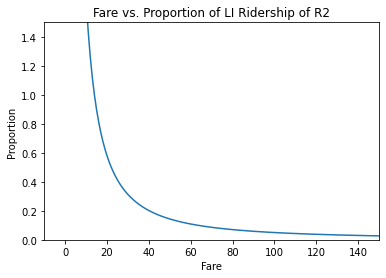

In [33]:
plt.figure()
plt.plot(fare, prop_li_ridership_r2)
plt.xlim(-10,150)
plt.ylim(0,1.5)
plt.ylabel("Proportion")
plt.xlabel("Fare")
plt.title("Fare vs. Proportion of LI Ridership of R2")
plt.show()